# Import Satements

In [117]:
import warnings
warnings.filterwarnings("ignore") 

In [118]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Loading Conc Data

In [119]:
data = pd.read_excel("Book1.xlsx")
print(tabulate(data, headers='keys', tablefmt='fancy_grid'))

╒══════╤═════════════════════╤════════╤════════╤═══════════╤═══════════╤═══════════╤═════════╤═══════════╤═════════╤═════════╤══════════╤═══════════╤═════════╤══════════╤═════════╕
│      │ DATE                │   TIME │   Togo │   Algeria │   Senegal │   Morocco │    P2O5 │      SpGr │ Solid   │   H2SO4 │   T P2O5 │   WS P2O5 │   % H2O │ 10% pH   │      WI │
╞══════╪═════════════════════╪════════╪════════╪═══════════╪═══════════╪═══════════╪═════════╪═══════════╪═════════╪═════════╪══════════╪═══════════╪═════════╪══════════╪═════════╡
│    0 │ 2023-04-01 00:00:00 │      3 │     50 │        50 │         0 │         0 │   0     │   0       │ 0       │   0     │    0     │     0     │    0    │ 0        │   0     │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼───────────┼─────────┼───────────┼─────────┼─────────┼──────────┼───────────┼─────────┼──────────┼─────────┤
│    1 │ NaT                 │      7 │     50 │        50 │         0 │         0 │   0     │ 

# Selecting required features

In [120]:
data = data.drop(['SpGr','Solid','H2SO4','WS P2O5','10% pH','% H2O','WI'],axis =1)
print(tabulate(data, headers='keys', tablefmt='fancy_grid'))
print("Lenght before removing zero values:",len(data))

╒══════╤═════════════════════╤════════╤════════╤═══════════╤═══════════╤═══════════╤═════════╤══════════╕
│      │ DATE                │   TIME │   Togo │   Algeria │   Senegal │   Morocco │    P2O5 │   T P2O5 │
╞══════╪═════════════════════╪════════╪════════╪═══════════╪═══════════╪═══════════╪═════════╪══════════╡
│    0 │ 2023-04-01 00:00:00 │      3 │     50 │        50 │         0 │         0 │   0     │    0     │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼───────────┼─────────┼──────────┤
│    1 │ NaT                 │      7 │     50 │        50 │         0 │         0 │   0     │    0     │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼───────────┼─────────┼──────────┤
│    2 │ NaT                 │     11 │     50 │        50 │         0 │         0 │   0     │    0     │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼───────────┼─────────┼──────────┤
│    3 │ NaT                 │     15 │     50

In [121]:
data['DATE'] = data['DATE'].ffill()

> Removing Null values

In [122]:
data.dropna(inplace = True)
len(data)

2140

In [123]:
data = data[data['Morocco']==0]
data = data.drop('Morocco',axis=1)
data

DATE  TIME  Togo  Algeria  Senegal   P2O5  T P2O5
0    2023-04-01   3.0  50.0     50.0      0.0   0.00    0.00
1    2023-04-01   7.0  50.0     50.0      0.0   0.00    0.00
2    2023-04-01  11.0  50.0     50.0      0.0   0.00    0.00
3    2023-04-01  15.0  50.0     50.0      0.0  24.78    1.47
4    2023-04-01  19.0  50.0     50.0      0.0   0.00    0.00
...         ...   ...   ...      ...      ...    ...     ...
2321 2024-05-15   7.0  60.0     40.0      0.0  25.30    1.08
2322 2024-05-15  11.0  60.0     40.0      0.0  25.40    1.05
2323 2024-05-15  15.0  60.0     40.0      0.0  28.32    1.60
2324 2024-05-15  19.0  60.0     40.0      0.0  27.88    1.45
2325 2024-05-15  23.0  60.0     40.0      0.0  25.11    1.20

[1939 rows x 7 columns]

# Handling Shutdown values

In [124]:
data= data[data.iloc[:, 6] != 0]
data = data[data.iloc[:, 6].notnull()]

data.reset_index(drop=True, inplace=True)
print(tabulate(data, headers='keys', tablefmt='fancy_grid'))
print("Lenght after removing zero and NUll values:",len(data))

╒══════╤═════════════════════╤════════╤════════╤═══════════╤═══════════╤════════╤══════════╕
│      │ DATE                │   TIME │   Togo │   Algeria │   Senegal │   P2O5 │   T P2O5 │
╞══════╪═════════════════════╪════════╪════════╪═══════════╪═══════════╪════════╪══════════╡
│    0 │ 2023-04-01 00:00:00 │     15 │     50 │        50 │         0 │ 24.78  │    1.47  │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼────────┼──────────┤
│    1 │ 2023-04-01 00:00:00 │     23 │     50 │        50 │         0 │ 26.96  │    0.68  │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼────────┼──────────┤
│    2 │ 2023-04-02 00:00:00 │      3 │     50 │        50 │         0 │ 28     │    1.16  │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼────────┼──────────┤
│    3 │ 2023-04-02 00:00:00 │      7 │     50 │        50 │         0 │ 26     │    1.19  │
├──────┼─────────────────────┼────────┼────────┼───────────┼──────────

# Assigning Labels(combinations)

In [125]:
data['combinations'] = ''

# Iterate through each row of the DataFrame
for index, row in data.iterrows():
    symbol = ''
    values = ''
    # Iterate through the first four features
    for feat, val in row[2:5].items():
        # If the value is not 0, add it to the combination string
        if val != 0:
            symbol += f'{feat[0]}:'
            values += f'{int(val)}:'
    # Remove the trailing colon
    combination = symbol+values
    combination = combination.rstrip(':')
    # Assign the combination string to the "combinations" feature
    data.at[index, 'combinations'] = combination

print(tabulate(data, headers='keys', tablefmt='fancy_grid'))

╒══════╤═════════════════════╤════════╤════════╤═══════════╤═══════════╤════════╤══════════╤════════════════╕
│      │ DATE                │   TIME │   Togo │   Algeria │   Senegal │   P2O5 │   T P2O5 │ combinations   │
╞══════╪═════════════════════╪════════╪════════╪═══════════╪═══════════╪════════╪══════════╪════════════════╡
│    0 │ 2023-04-01 00:00:00 │     15 │     50 │        50 │         0 │ 24.78  │    1.47  │ T:A:50:50      │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼────────┼──────────┼────────────────┤
│    1 │ 2023-04-01 00:00:00 │     23 │     50 │        50 │         0 │ 26.96  │    0.68  │ T:A:50:50      │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼────────┼──────────┼────────────────┤
│    2 │ 2023-04-02 00:00:00 │      3 │     50 │        50 │         0 │ 28     │    1.16  │ T:A:50:50      │
├──────┼─────────────────────┼────────┼────────┼───────────┼───────────┼────────┼──────────┼────────────────┤
│    3 │ 2

In [126]:
data.min()

DATE            2023-04-01 00:00:00
TIME                            3.0
Togo                            0.0
Algeria                         0.0
Senegal                         0.0
P2O5                           22.2
T P2O5                         0.58
combinations              A:S:50:50
dtype: object

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])

data['Day'] = data['DATE'].dt.date
days_per_combination = data.groupby('combinations')['Day'].nunique().reset_index()
days_per_combination.columns = ['combinations', 'No. of Days']

data = data.merge(days_per_combination, on='combinations', how='left')

data = data[data['No. of Days']>10]

# Handling Outliers

In [127]:
import pandas as pd

# Initialize a dictionary to store outlier counts for each field
outliers = {}

# Define a function to count outliers using the IQR method
def count_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((group < lower_bound) | (group > upper_bound)).sum()

# Loop through each column and count outliers
for col in data.columns[5:7]:
    outliers[col] = data.groupby('combinations')[col].apply(count_outliers)

# Convert outliers dictionary to a DataFrame
outliers_data = pd.DataFrame(outliers)
print("No. of Outliers is each field:\n",outliers_data)

No. of Outliers is each field:
                 P2O5  T P2O5
combinations                
A:S:50:50          2       1
A:S:60:40          1       2
A:S:67:33          0       1
T:100              1       1
T:A:33:67          0       1
T:A:40:60          8      12
T:A:50:50         12      14
T:A:60:40          1      10
T:A:75:25          0       0
T:A:S:10:60:30     0       0
T:A:S:15:70:15     0       0
T:A:S:20:60:20     6       7
T:A:S:30:60:10     5      16
T:A:S:40:40:20     3       7
T:A:S:40:50:10     1       6
T:A:S:50:30:20     0       1
T:A:S:50:40:10     1       1


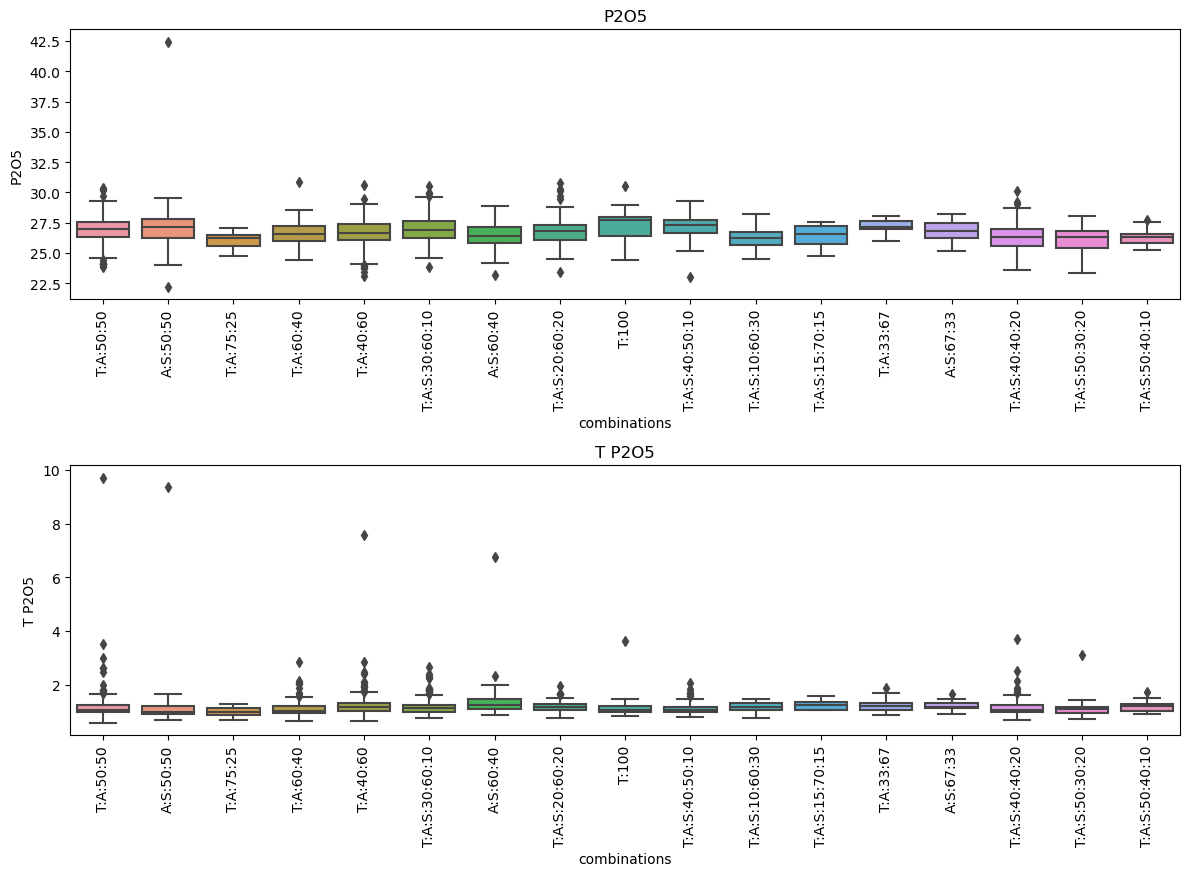

In [128]:
plt.figure(figsize=(12, 25))

z = 1
for i in ['P2O5', 'T P2O5']:
    
    plt.subplot(6,1, z)
    sns.boxplot(x='combinations', y=f'{i}', data=data)
    plt.title(i)
    plt.xticks(rotation=90)
    z += 1

plt.tight_layout()
plt.show()

In [129]:
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

columns_to_check = data.columns[5:7]

data = remove_outliers(data, columns_to_check)

print(len(data))

1666


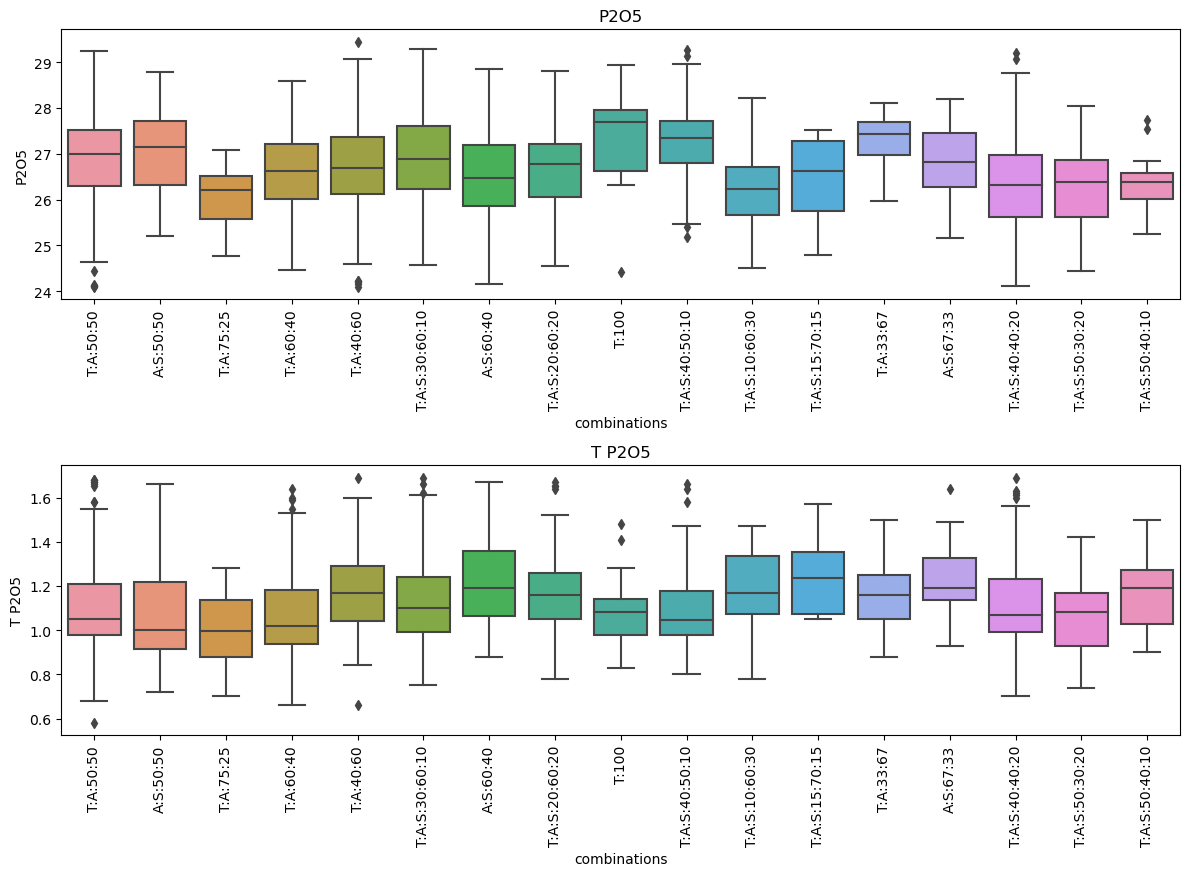

In [130]:
plt.figure(figsize=(12, 25))

z = 1
for i in ['P2O5', 'T P2O5']:
    
    plt.subplot(6,1, z)
    sns.boxplot(x='combinations', y=f'{i}', data=data)
    plt.title(i)
    plt.xticks(rotation=90)
    z += 1

plt.tight_layout()
plt.show()

# Ranking Algorithm

In [134]:

ranks = {}

grouped = data.groupby('combinations')['P2O5'].agg(
    median='median',
    std='std',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    min='min',
    max='max'
)
grouped['IQR'] = grouped['Q3'] - grouped['Q1']
grouped['Range'] = grouped['max'] - grouped['min']
grouped['Median_norm'] = (grouped['median'] - grouped['median'].min()) / (grouped['median'].max() - grouped['median'].min())
grouped['IQR_norm'] = (grouped['IQR'].max() - grouped['IQR']) / (grouped['IQR'].max() - grouped['IQR'].min())
grouped['Range_norm'] = (grouped['Range'].max() - grouped['Range']) / (grouped['Range'].max() - grouped['Range'].min())

grouped['Std_norm'] = (grouped['std'].max() - grouped['std']) / (grouped['std'].max() - grouped['std'].min()) 

grouped['Total Score'] =  grouped['Median_norm'] + grouped['IQR_norm'] + grouped['Range_norm']  + grouped['Std_norm'] #+ grouped['Skewness_Score']grouped['Mean_norm'] +
grouped['Rank'] = grouped['Total Score'].rank(ascending=False)

ranks[f"P2O5"] = grouped['Rank'].astype(int)

In [135]:


grouped = data.groupby('combinations')['T P2O5'].agg(
    median='median',
    std='std',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    min='min',
    max='max'
)
grouped['IQR'] = grouped['Q3'] - grouped['Q1']
grouped['Range'] = grouped['max'] - grouped['min']

grouped['Median_norm'] = (grouped['median'].max() - grouped['median']) / (grouped['median'].max() - grouped['median'].min()) 
grouped['IQR_norm'] = (grouped['IQR'].max() - grouped['IQR']) / (grouped['IQR'].max() - grouped['IQR'].min()) 
grouped['Range_norm'] = (grouped['Range'].max() - grouped['Range']) / (grouped['Range'].max() - grouped['Range'].min())  
grouped['Std_norm'] = (grouped['std'].max() - grouped['std']) / (grouped['std'].max() - grouped['std'].min())  

grouped['Total Score'] =  grouped['Median_norm'] + grouped['IQR_norm'] + grouped['Range_norm']  + grouped['Std_norm'] #+ grouped['Skewness_Score']grouped['Mean_norm'] +
grouped['Rank'] = grouped['Total Score'].rank(ascending=False)

ranks[f"T P2O5"] = grouped['Rank'].astype(int)

ranks_data = pd.DataFrame(ranks)
print("Feature Ranking:(Combinations and their corresponidng ranks for each feature)")
print(tabulate(ranks_data, headers='keys', tablefmt='fancy_grid'))

Feature Ranking:(Combinations and their corresponidng ranks for each feature)
╒════════════════╤════════╤══════════╕
│ combinations   │   P2O5 │   T P2O5 │
╞════════════════╪════════╪══════════╡
│ A:S:60:40      │      7 │        8 │
├────────────────┼────────┼──────────┤
│ T:A:40:60      │      6 │        7 │
├────────────────┼────────┼──────────┤
│ T:A:50:50      │      3 │        3 │
├────────────────┼────────┼──────────┤
│ T:A:60:40      │      4 │        2 │
├────────────────┼────────┼──────────┤
│ T:A:S:20:60:20 │      2 │        4 │
├────────────────┼────────┼──────────┤
│ T:A:S:30:60:10 │      5 │        6 │
├────────────────┼────────┼──────────┤
│ T:A:S:40:40:20 │      8 │        5 │
├────────────────┼────────┼──────────┤
│ T:A:S:40:50:10 │      1 │        1 │
╘════════════════╧════════╧══════════╛


# Visulazing data w.r.t to their field ranks

Index(['DATE', 'TIME', 'Togo', 'Algeria', 'Senegal', 'P2O5_x', 'T P2O5_x',
       'combinations', 'Day', 'No. of Days', 'P2O5_y', 'T P2O5_y'],
      dtype='object')


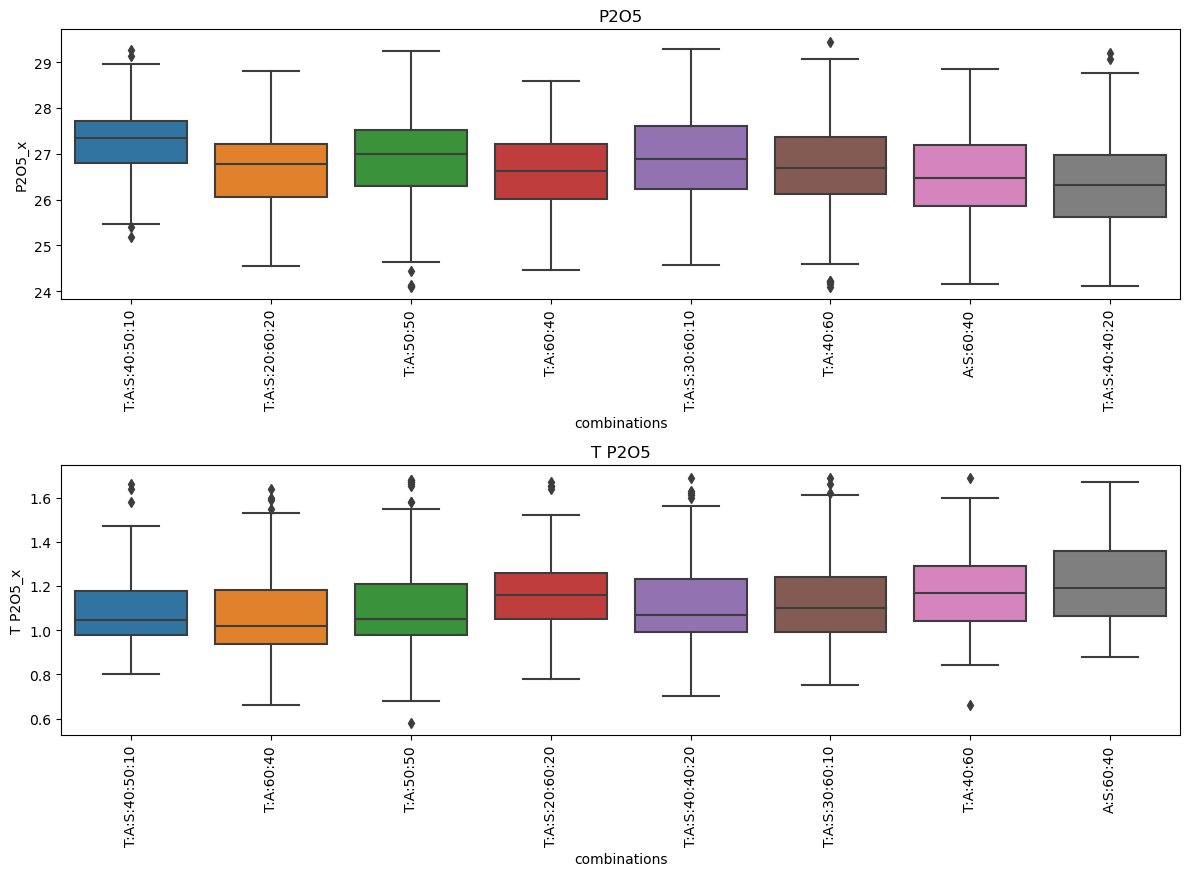

In [136]:
plt.figure(figsize=(12, 25))

merged_data = pd.merge(data, ranks_data, on='combinations')
print(merged_data.columns)
z = 1
for i in ranks_data.columns:
    sorted_data = merged_data.sort_values(by=f'{i}_y')
    
    plt.subplot(6,1, z)
    sns.boxplot(x='combinations', y=f'{i}_x', data=sorted_data, order=sorted_data['combinations'].unique())
    plt.title(i)
    plt.xticks(rotation=90)
    z += 1

plt.tight_layout()
plt.show()

# Loading Production Dataset

In [137]:
data_prod = pd.read_excel('rock_comp_prod.xlsx')
print(tabulate(data_prod.head(), headers='keys', tablefmt='fancy_grid'))
len(data_prod)

╒════╤════════╤═══════════╤════════════╤═══════════╤══════════════╕
│    │   Togo │   Algeria │   Senegal  │   Morocco │   Production │
╞════╪════════╪═══════════╪════════════╪═══════════╪══════════════╡
│  0 │     50 │        50 │          0 │         0 │      238.945 │
├────┼────────┼───────────┼────────────┼───────────┼──────────────┤
│  1 │     50 │        50 │          0 │         0 │      507.84  │
├────┼────────┼───────────┼────────────┼───────────┼──────────────┤
│  2 │     50 │        50 │          0 │         0 │      216.73  │
├────┼────────┼───────────┼────────────┼───────────┼──────────────┤
│  3 │     50 │        50 │          0 │         0 │      252.637 │
├────┼────────┼───────────┼────────────┼───────────┼──────────────┤
│  4 │     50 │        50 │          0 │         0 │      600.174 │
╘════╧════════╧═══════════╧════════════╧═══════════╧══════════════╛


411

In [138]:
data_prod.dropna(inplace=True)
len(data_prod)

389

In [139]:
data_prod = data_prod[data_prod['Morocco']==0]
data_prod = data_prod.drop('Morocco',axis=1)

# Assigning Labels

In [140]:
data_prod['combinations'] = ''

for index, row in data_prod.iterrows():
    symbol = ''
    values = ''
    for feat, val in row[:3].items():
        if val != 0:
            symbol += f'{feat[0]}:'
            values += f'{int(val)}:'
    combination = symbol+values
    combination = combination.rstrip(':')
    data_prod.at[index, 'combinations'] = combination

print(tabulate(data_prod, headers='keys', tablefmt='fancy_grid'))

╒═════╤════════╤═══════════╤════════════╤══════════════╤════════════════╕
│     │   Togo │   Algeria │   Senegal  │   Production │ combinations   │
╞═════╪════════╪═══════════╪════════════╪══════════════╪════════════════╡
│   0 │     50 │        50 │          0 │      238.945 │ T:A:50:50      │
├─────┼────────┼───────────┼────────────┼──────────────┼────────────────┤
│   1 │     50 │        50 │          0 │      507.84  │ T:A:50:50      │
├─────┼────────┼───────────┼────────────┼──────────────┼────────────────┤
│   2 │     50 │        50 │          0 │      216.73  │ T:A:50:50      │
├─────┼────────┼───────────┼────────────┼──────────────┼────────────────┤
│   3 │     50 │        50 │          0 │      252.637 │ T:A:50:50      │
├─────┼────────┼───────────┼────────────┼──────────────┼────────────────┤
│   4 │     50 │        50 │          0 │      600.174 │ T:A:50:50      │
├─────┼────────┼───────────┼────────────┼──────────────┼────────────────┤
│   5 │      0 │        50 │         5

In [141]:
len(data_prod)

350

In [142]:
data_prod = data_prod[data_prod['Production'] != 0]
len(data_prod)

346

In [143]:
data_prod['No. of Days'] = data_prod.groupby('combinations')['combinations'].transform('count')
data_prod = data_prod[data_prod['No. of Days']>10]
data_prod

Togo  Algeria  Senegal   Production    combinations  No. of Days
0    50.0     50.0       0.0     238.945       T:A:50:50           68
1    50.0     50.0       0.0     507.840       T:A:50:50           68
2    50.0     50.0       0.0     216.730       T:A:50:50           68
3    50.0     50.0       0.0     252.637       T:A:50:50           68
4    50.0     50.0       0.0     600.174       T:A:50:50           68
..    ...      ...       ...         ...             ...          ...
396  40.0     40.0      20.0     711.000  T:A:S:40:40:20           40
397  40.0     40.0      20.0     751.000  T:A:S:40:40:20           40
408  60.0     40.0       0.0     706.000       T:A:60:40           36
409  60.0     40.0       0.0     731.000       T:A:60:40           36
410  60.0     40.0       0.0     722.000       T:A:60:40           36

[302 rows x 6 columns]

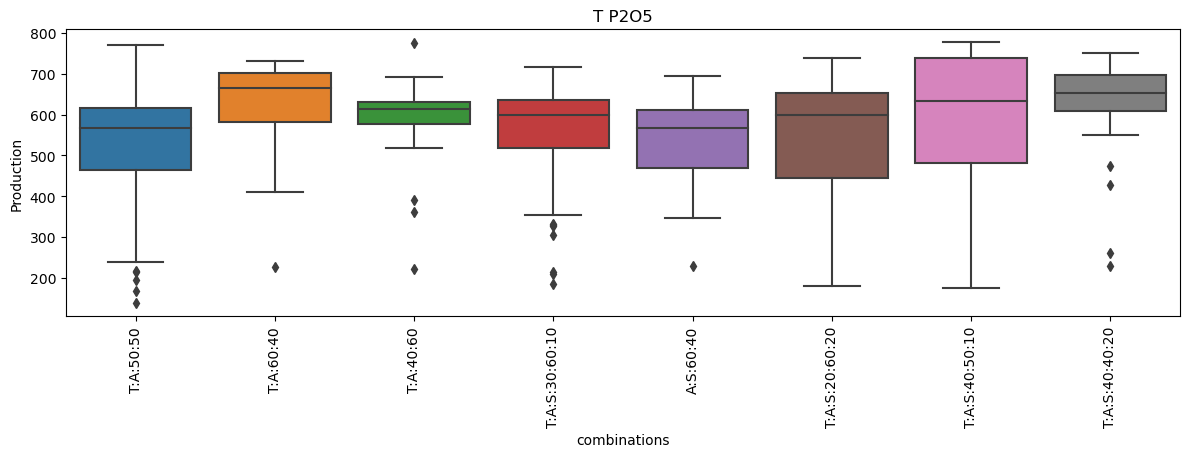

In [144]:
plt.figure(figsize=(12, 25))

z = 1

plt.subplot(6,1, z)
sns.boxplot(x='combinations', y='Production', data=data_prod)
plt.title(i)
plt.xticks(rotation=90)
z += 1

plt.tight_layout()
plt.show()

In [145]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_check = [data_prod.columns[3]]

data_prod= remove_outliers(data_prod, columns_to_check)
data_prod.reset_index(drop=True, inplace=True)
print(len(data_prod))

277


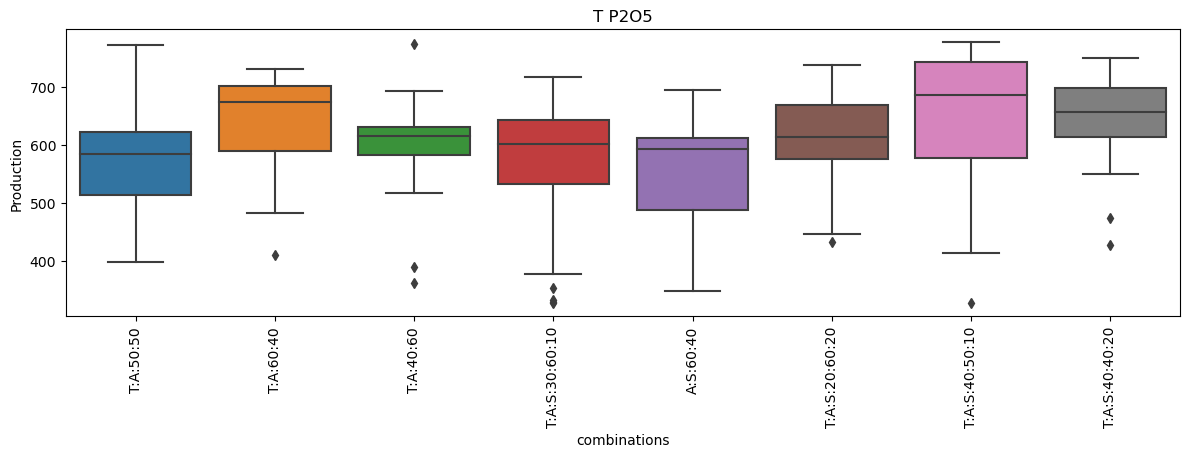

In [146]:
plt.figure(figsize=(12, 25))

z = 1

plt.subplot(6,1, z)
sns.boxplot(x='combinations', y='Production', data=data_prod)
plt.title(i)
plt.xticks(rotation=90)
z += 1

plt.tight_layout()
plt.show()

In [147]:
data_prod.min()

Togo                  0.0
Algeria              40.0
Senegal               0.0
Production          327.0
combinations    A:S:60:40
No. of Days            18
dtype: object

# Ranking for Production

In [148]:
grouped = data_prod.groupby('combinations')['Production'].agg(
    median='median',
    std='std',
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    min='min',
    max='max'
)
grouped['IQR'] = grouped['Q3'] - grouped['Q1']
grouped['Range'] = grouped['max'] - grouped['min']

grouped['Median_norm'] = (grouped['median'] - grouped['median'].min()) / (grouped['median'].max() - grouped['median'].min())
grouped['IQR_norm'] = (grouped['IQR'].max() - grouped['IQR']) / (grouped['IQR'].max() - grouped['IQR'].min())
grouped['Range_norm'] = (grouped['Range'].max() - grouped['Range']) / (grouped['Range'].max() - grouped['Range'].min())

# grouped['Skewness_Score'] = grouped['Skewness'].apply(skewness_score)

grouped['Std_norm'] = (grouped['std'].max() - grouped['std']) / (grouped['std'].max() - grouped['std'].min()) 

grouped['Total Score'] =  grouped['Median_norm'] + grouped['IQR_norm'] + grouped['Range_norm']  + grouped['Std_norm'] #+ grouped['Skewness_Score']grouped['Mean_norm'] +
grouped['Rank'] = grouped['Total Score'].rank(ascending=False)

ranks[f"Production"] = grouped['Rank'].astype(int)

ranks_data = pd.DataFrame(ranks)
print("Feature Ranking:(Combinations and their corresponidng ranks for each feature)")
print(tabulate(ranks_data, headers='keys', tablefmt='fancy_grid'))


excel_data = pd.DataFrame(grouped)
excel_data.to_excel('P2 Prod.xlsx')

Feature Ranking:(Combinations and their corresponidng ranks for each feature)
╒════════════════╤════════╤══════════╤══════════════╕
│ combinations   │   P2O5 │   T P2O5 │   Production │
╞════════════════╪════════╪══════════╪══════════════╡
│ A:S:60:40      │      7 │        8 │            8 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:40:60      │      6 │        7 │            3 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:50:50      │      3 │        3 │            7 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:60:40      │      4 │        2 │            2 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:S:20:60:20 │      2 │        4 │            4 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:S:30:60:10 │      5 │        6 │            6 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:S:40:40:20 │      8 │        5 │            1 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:

# 1 3 9 Ranking for each field

In [149]:
for i in ranks_data.columns:
    for j in range(len(ranks_data.values)):
        if(ranks_data[i][j]<=3):
            ranks_data[i][j] = 9
        elif(ranks_data[i][j]>=4 and ranks_data[i][j]<=6):
            ranks_data[i][j] = 3
        else:
            ranks_data[i][j] = 1
            
print(tabulate(ranks_data, headers='keys', tablefmt='fancy_grid'))

╒════════════════╤════════╤══════════╤══════════════╕
│ combinations   │   P2O5 │   T P2O5 │   Production │
╞════════════════╪════════╪══════════╪══════════════╡
│ A:S:60:40      │      1 │        1 │            1 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:40:60      │      3 │        1 │            9 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:50:50      │      9 │        9 │            1 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:60:40      │      3 │        9 │            9 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:S:20:60:20 │      9 │        3 │            3 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:S:30:60:10 │      3 │        3 │            3 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:S:40:40:20 │      1 │        3 │            9 │
├────────────────┼────────┼──────────┼──────────────┤
│ T:A:S:40:50:10 │      9 │        9 │            3 │
╘════════════════╧════════╧═

# Overall Scoring

In [150]:
ranks_data['Final_Score'] = [0]*len(ranks_data)
for i in range(len(ranks_data)):
    ranks_data['Final_Score'][i] = 1*ranks_data['P2O5'][i]+9*ranks_data['T P2O5'][i]+3*ranks_data['Production'][i]
ranks_data = ranks_data.sort_values(by='Final_Score',ascending=False)
ranks_data['Final_Rank'] =  [i for i in range(1,len(ranks_data)+1)]
print(tabulate(ranks_data, headers='keys', tablefmt='fancy_grid'))

╒════════════════╤════════╤══════════╤══════════════╤═══════════════╤══════════════╕
│ combinations   │   P2O5 │   T P2O5 │   Production │   Final_Score │   Final_Rank │
╞════════════════╪════════╪══════════╪══════════════╪═══════════════╪══════════════╡
│ T:A:60:40      │      3 │        9 │            9 │           111 │            1 │
├────────────────┼────────┼──────────┼──────────────┼───────────────┼──────────────┤
│ T:A:S:40:50:10 │      9 │        9 │            3 │            99 │            2 │
├────────────────┼────────┼──────────┼──────────────┼───────────────┼──────────────┤
│ T:A:50:50      │      9 │        9 │            1 │            93 │            3 │
├────────────────┼────────┼──────────┼──────────────┼───────────────┼──────────────┤
│ T:A:S:40:40:20 │      1 │        3 │            9 │            55 │            4 │
├────────────────┼────────┼──────────┼──────────────┼───────────────┼──────────────┤
│ T:A:S:20:60:20 │      9 │        3 │            3 │            

In [151]:
vis_data = pd.merge(ranks_data,data_prod[['No. of Days','combinations']],on=['combinations'],how='left')
vis_data = vis_data.drop_duplicates()
print(tabulate(vis_data, headers='keys', tablefmt='fancy_grid'))

╒═════╤════════════════╤════════╤══════════╤══════════════╤═══════════════╤══════════════╤═══════════════╕
│     │ combinations   │   P2O5 │   T P2O5 │   Production │   Final_Score │   Final_Rank │   No. of Days │
╞═════╪════════════════╪════════╪══════════╪══════════════╪═══════════════╪══════════════╪═══════════════╡
│   0 │ T:A:60:40      │      3 │        9 │            9 │           111 │            1 │            36 │
├─────┼────────────────┼────────┼──────────┼──────────────┼───────────────┼──────────────┼───────────────┤
│  35 │ T:A:S:40:50:10 │      9 │        9 │            3 │            99 │            2 │            23 │
├─────┼────────────────┼────────┼──────────┼──────────────┼───────────────┼──────────────┼───────────────┤
│  55 │ T:A:50:50      │      9 │        9 │            1 │            93 │            3 │            68 │
├─────┼────────────────┼────────┼──────────┼──────────────┼───────────────┼──────────────┼───────────────┤
│ 115 │ T:A:S:40:40:20 │      1 │    